<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>

# <center>Clustering Jerárquico</center>

Bienvenidos al Lab de Clustering Jerárquico con Python usando Scipy y el paquete Scikit-learn.

# Clustering Jerárquico - Aglomerativo

Estaremos viendo la técnica de clustering, la cual es <b>Clustering Jerárquico Aglomerativo</b>. Recuerda que este enfoque, el aglomerativo, es un enfoque de abajo hacia arriba (bottom up). <br> <br>
En este laboratorio, estaremos observando Clustering Aglomerativo, el cual es más popular que el Clustering Divisivo. <br> <br>
También estaremos utilizando Enlace Completo como el Criterio de Enlaces. <br>
<b> <i> NOTA: Puedes también intentar usar Enlaces Promedio donde el Enlace Completo sería usando, de esta forma, ¡verás la diferencia! </i> </b>

In [2]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
#from sklearn.datasets.samples_generator import make_blobs 
from sklearn.datasets import make_blobs
%matplotlib inline

---
### Generando los Datos Aleatorios
Estaremos generando un conjunto de datos usando la clase <b>make_blobs</b>. <br> <br>
Ingresa estos parámetros dentro de make_blobs:
<ul>
    <li> <b>n_samples</b>: Total de puntos divididos equitativamente entre los clusters. </li>
    <ul> <li> Elegir un número entre 10-1500 </li> </ul>
    <li> <b>centers</b>: El número de centros para generar, o las ubicaciones de centro fijas. </li>
    <ul> <li> Elegir arreglas de coordenadas x,y para generar los centros. Tienes centros entre 1-10 (ej. centers=[[1,1], [2,5]]) </li> </ul>
    <li> <b>cluster_std</b>: El desvío estándar de los clusters. Mientras más grande el número, más separados estarán los clusters.</li>
    <ul> <li> Elegir un número entre 0.5-1.5 </li> </ul>
</ul> <br>
Guarda el resultado en <b>X1</b> y en <b>y1</b>.

In [3]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

Dibuj de la distribución de los puntos de los datos generados al azar

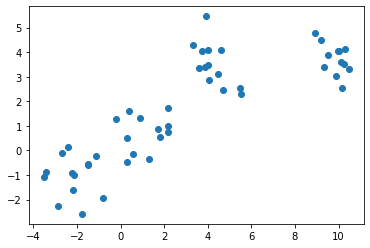

In [4]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

---
### Clustering Aglomerativo
Comenzaremos haciendo el clustering de los datos aleatorios de los puntos que recién creamos.

The <b> La clase de Clustering Aglomerativo </b> necesita dos entradas:
<ul>
    <li> <b>n_clusters</b>: El número de clusters a formar y el número de centroides a generar. </li>
    <ul> <li> Value will be: 4 </li> </ul>
    <li> <b>linkage</b>: Criterio de Enlace a utilizar. El criterio de enlace determina la distancia a usar entre varias observaciones. El algoritmos agrupará en pares los clusters que minimizarán este criterio. </li>
    <ul> 
        <li> El valor será: 'complete' </li> 
        <li> <b>Note</b>: Se recomienda también intentar todo con 'average' </li>
    </ul>
</ul> <br>
Guarda el resultado en una variable llamada <b> agglom </b>

In [5]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

Ajusta el modelo con <b> X1 </b> y <b> y1 </b> a partir de los datos generados anteriormente.

In [6]:
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

¡Ejecuta el siguiente código para mostrar el clustering! <br>
Recuerda leer el código y los comentarios para ganar más compresión de cómo trabaja el proceso de tramado/dibujo/ploteo.

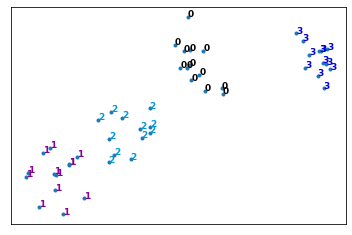

In [7]:
# Crear una figura de 6 pulgadas (aprox 15cm) por 4 pulgadas (aprox 10 cm).
plt.figure(figsize=(6,4))

# Estas dos líneas de código se usan para reducir los puntos de datos,
# porque sino los puntos de datos se verían muy separados y dispersos.

# Crear un rango mínimo y máximo de X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Obtener la distancia promedio para X1.
X1 = (X1 - x_min) / (x_max - x_min)

# Este loop muestra todos los puntos de datos.
for i in range(X1.shape[0]):
    # Reemplaza los puntos de datos con su valor de cluster respectivo 
    # (ej. 0) está codificado con un mapa de colores (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Elimina los ticks x, ticks y, y los ejes x e y
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Muestra el punteado de los datos originales ántes de clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Muestra el punteo
plt.show()


### Dendograma Asociado al Clustering Aglomerativo Jerárquico
Recuerda que una <b>matriz de distancia</b> contiene la <b> distancia de cada punto hacia cualquier otro punto del set de datos </b>. <br>
Usa la función <b> distance_matrix, </b> la cual necesita <b>dos entradas</b>. Usa la Matriz de Confusión, <b> X1 </b> como ambas entradas para guardar la matriz de distancia en una variable de nombre <b> dist_matrix </b> <br> <br>
Recuerda que los valores de sitancia son simétricos, con una diagonal de ceros. Esta es una forma de asegurarse que tu matriz es correcta. <br> (imprime dist_matrix para asegurarte que es correcta)

In [9]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.1807641  0.45942613 ... 0.51498407 0.46301564 0.45451727]
 [0.1807641  0.         0.41104072 ... 0.47000869 0.3751551  0.43535137]
 [0.45942613 0.41104072 0.         ... 0.87913836 0.10182207 0.8462564 ]
 ...
 [0.51498407 0.47000869 0.87913836 ... 0.         0.83051529 0.08339204]
 [0.46301564 0.3751551  0.10182207 ... 0.83051529 0.         0.80617523]
 [0.45451727 0.43535137 0.8462564  ... 0.08339204 0.80617523 0.        ]]


Usando la clase de <b> enlace </b> de la jerarquía, pasa los parámetros:
<ul>
    <li> La matriz de distancia </li>
    <li> 'completa' se refiere al enlace completo </li>
</ul> <br>
Guarda el resultado en una variable de nombre <b> Z </b>

In [10]:
Z = hierarchy.linkage(dist_matrix, 'complete')

<ipython-input-10-3814b774a052>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


Un clustering jerárquico se visualiza como un dendograma como se muestra en la siguiente celda. Cada agrupamiento se representa por una linea horizontal. La coordenada y de la linea horizontal se refiere a la similitud entre dos clusters que se agruparon, donde las ciudades se visualizan como clusters individuales. 
Moviéndose para arriba desde la capa inferior hacia el nodo superior,un dendograma nos permite reconstruir la historia de agrupamientos que resultaron en el clustering representado. 

Luego, guardaremos el dendograma en una variable llamada <b>dendro</b>. Al hacer esto, el dendograma también se dibujará.
Utilizando la clase <b> dendrograma </b> de la jerarquía, se pasa en el parámetro:
<ul> <li> Z </li> </ul>

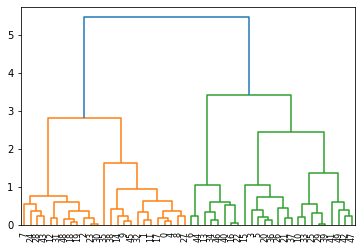

In [11]:
dendro = hierarchy.dendrogram(Z)

## Práctica
Usamos enlace __completo__ en nuestro caso, lo cambiamos a enlace __promedio__ para ver cómo un dendograma cambia.

<ipython-input-12-b9b2ef86aa07>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


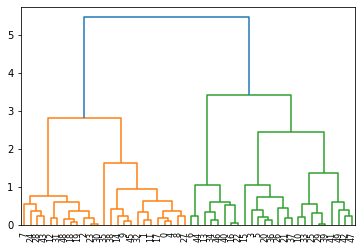

In [12]:
# escribe tu código aquí
Z = hierarchy.linkage(dist_matrix, 'complete')
dendro = hierarchy.dendrogram(Z)



Haz doble click __aquí__ para ver la solución.

<!-- Tu respuesta debajo:
    
Z = hierarchy.linkage(dist_matrix, 'average')
dendro = hierarchy.dendrogram(Z)

-->

---
# Agrupando el dataset Vehículo

Imagina que una fábrica de vehículos desarrolló prototipos para un nuevo vehículo. Antes de presentar el nuevo modelo, el fabracante quiere saber que vehículos existen en el mercado similares al prototipo--es decir, cómo se pueden agrupar los vehículos, qué grupo es el más parecido al del modelo y de esta forma, qué modelos competirán con el nuevo.

Nuestro objetivo es utilizar métodos de clustering para encontrar los clusters más diferentes de vehículos. Se resumirán los vehículos actuales y ayudará al proceso de fabricación para tomar mejores decisiones para hacer modelos más simples.

### Descargar los datos
Para descargar los datos, usaremos **`!wget`** desde IBM Object Storage.  
__¿Sabías?__ Cuando se trata de Machine Learning, seguro trabajarás con grandes datasets (juego de datos). Entonces, ¿dónde podrás guardar esos datos? IBM ofrece una oportunidad única para las empresas, con 10 Tb de IBM Cloud Object Storage: [Registrate ahora gratuitamente](http://cocl.us/ML0101EN-IBM-Offer-CC)

In [ ]:
!wget -O cars_clus.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv

## Read data
lets read dataset to see what features the manufacturer has collected about the existing models.

In [ ]:
filename = 'cars_clus.csv'

#Read csv
pdf = pd.read_csv(filename)
print ("Forma del set de datos: ", pdf.shape)

pdf.head(5)

Los conjuntos de datos incluyen el precio en miles (price), tamaño de motor (engine_s), caballos de fuerza (horsepow), distancia entre ejes (wheelbas), ancho (width), largo (length), peso en vació (curb_wgt), capacidad de combustible (fuel_cap) y eficiencia de combustible (mpg).

### Limpieza de Datos
limpiemos el set de datos eliminando filas que tienen valores nulos:

In [ ]:
print ("Shape of dataset before cleaning: ", pdf.size)
pdf[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print ("Forma del dataset luego de la limpieza: ", pdf.size)
pdf.head(5)

### Selección de Característica
Elijamos nuestro set en cuestión:

In [ ]:
featureset = pdf[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

### Normalización
Ahora podemos normalizar el set. __MinMaxScaler__ transforma poniendo en escala a un rango. Por omisión es (0, 1). Es decir, las escalas dee estimación se traducen cada una individualmente de forma tal de quedar entre cero y uno.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

## Agrupando utilizando Scipy
En esta parte, usaremos el paquete Scipy para agrupar el set de datos:  
Primero, calcularemos la matriz de distancia. 

In [ ]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

En el clustering aglomerativo, en cada iteración, el algoritmo debe actualizar la matriz para refrejar la distancia del nuevo cluster formado a partir de los clusters restantes. 
Los métodos siguientes los soporta Scipy para calcular la distancia entre los recientementes formados clusters y para cada:
    - simple
    - completo
    - promedio
    - ponderado
    - centroide
    
    
Usaremos __completo__ para nuestro caso, pero si deseas puedes cambiar para ver los diferentes resultados.

In [ ]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

Escencialmente, el clustering jerárquico no necesita de un número específico de clusters. Sin embargo, algunas aplicaciones que queremos una partición de clusters disjuntos como si fueran clustering tradicional.
Por lo tanto podrás usar una linea en el medio:

In [ ]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

También, podrás determinar la cantidad de clusters directamente:

In [ ]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters


Ahora, se trazará el dendograma:

In [ ]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

## Clustering utilizando scikit-learn
Volvamos a construir el cluster, pero esta vez usando el paquete scikit-learn:

In [ ]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

Ahora, podemos usar la función 'AgglomerativeClustering' de la librería scikit-learn para agrupar el set de datos. Esta función hace un clustering jerárquico por medio de un enfoque de abajo hacia arriba (bottom up). El criterio de enlace determina la métrica utilizada para la estrategia de unificación:

- Ward minimiza la suma de las diferencias cuadráticas dentro de todos los clusters. Es una enfoque minimizado y en este sentido se parece al la función de objetivo de k-medias pero está encarado con un enfoque jerárquico aglomerativo.
- El Enlace máximo o completo, minimiza la distancia máxima entre las observaciones de pares de clusters.
- El Enlace promedio minimiza el promedio de las distancias entre todas las observaciones de pares de clusters.

In [ ]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

Podemos agregar un nuevo campo a nuestro marco de datos para mostrar el cluster de cada fila:

In [ ]:
pdf['cluster_'] = agglom.labels_
pdf.head()

In [ ]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Crear una figura de 6 pulgadas (aprox 15cm) por 4 pulgadas (aprox 10cm).
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

Como se puede ver, es una distribución de cada cluster utilizando una trama esparcida, pero no está muy claro dónde es el centroide de cada cluster. Es más, hay 2 tipos de vehículos en nuestro set de datos, "truck" (valor de 1 en la columna tipo) y "car" (valor 1 en la columna tipo). Asi que los usaremos para distinguir las clases y sumarizar el cluster. Primero contamos la cantidad de casos de cada grupo:

In [ ]:
pdf.groupby(['cluster_','type'])['cluster_'].count()

Ahora, podemos examinar a las características de cada cluster:

In [ ]:
agg_cars = pdf.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars


Es obvio que tenemos 3 clusters principales donde están la mayoría de los vehículos en ellos.

__Coches__:
- Cluster 1: con algo mpg, y poco caballos de fuerza.
- Cluster 2: con buenos mpg y caballos de fuerza, pero un precio más alto que el promedio.
- Cluster 3: con bajo mpg, muchos caballos de fuerza y el precio más alto de todos.
    
    
    
__Camiones__:
- Cluster 1: con el más alto mpg entre los camiones, y lo más bajo en caballos de fuerza y precio.
- Cluster 2: con bajo mpg y media de caballos de fuerza, pero el precio más alto que el promedio.
- Cluster 3: con bueno mpg y caballos de fuerza, bajo precio.


Notar que no utilizamos __type__ , y __price__ de autos en el proceso de clustering, sino que utilizamos clustering Jerárquico para discriminar los clusters con una precisión bastante alta.

In [ ]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')


## ¿Deseas aprender más?

IBM SPSS Modeler es una plataforma para analytics que contiene varios algoritmos de machine learning. Fue diseñada para acercar inteligencia predictiva a las decisiones hechas por individuos, grupos, sistemas, toda la empresa. Un free trial está disponible a través de este curso en: [SPSS Modeler](http://cocl.us/ML0101EN-SPSSModeler).

Asi mismo, puedes utilizar Watson Studio para ejecutar estos notebooks más rápido y con datasets más grandes. Watson Studio es una solución en la nube lider de IBM's para científicos de datos, construída por científicos de datos. Con Jupyter notebooks, RStudio, Apache Spark y librerías conocidas pre instaladas en la nube, Watson Studio posibilita a los científicos de datos colaborar en sus proyectos sin tener que instalar nada. Sumate a la comunidad de usuarios Watson Studio hoy mismo por medio de una cuenta gratuita en [Watson Studio](https://cocl.us/ML0101EN_DSX)

### ¡Gracias por completar esta lección!

Notebook creado por: <a href = "https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>

<hr>
Copyright &copy; 2018 [Cognitive Class](https://cocl.us/DX0108EN_CC). Este lab y su código fuente fueron registrados bajo los términos de [MIT License](https://bigdatauniversity.com/mit-license/).​